<hr style="border-top-width: 4px; border-top-color: #34609b;">
# Import Libraries



In [2]:
import os
import sys
from pathlib import Path

curr_dir = Path(os.path.split(os.getcwd())[0])
utilities_dir = str(curr_dir.parent / 'utilities')

if utilities_dir not in sys.path:
	sys.path.append(utilities_dir)


In [4]:
import pandas as pd
import scipy
import utils as u
%matplotlib inline

# https://github.com/rdemaria/pytimber 123
import pytimber

ldb = pytimber.LoggingDB()

#MyFunctions:
import cals.signalCALS as scals, cals.detectBmodePattern as d


<hr style="border-top-width: 4px; border-top-color: #34609b;">

# Fetching CALS events



In [5]:
voltages_right = ldb.search('%R2%EARTH_RB')
print(voltages_right)


['MB.A11R2:U_EARTH_RB', 'MB.A13R2:U_EARTH_RB', 'MB.A15R2:U_EARTH_RB', 'MB.A17R2:U_EARTH_RB', 'MB.A19R2:U_EARTH_RB', 'MB.A21R2:U_EARTH_RB', 'MB.A23R2:U_EARTH_RB', 'MB.A25R2:U_EARTH_RB', 'MB.A27R2:U_EARTH_RB', 'MB.A29R2:U_EARTH_RB', 'MB.A31R2:U_EARTH_RB', 'MB.A33R2:U_EARTH_RB', 'MB.A8R2:U_EARTH_RB', 'MB.B10R2:U_EARTH_RB', 'MB.B13R2:U_EARTH_RB', 'MB.B15R2:U_EARTH_RB', 'MB.B17R2:U_EARTH_RB', 'MB.B19R2:U_EARTH_RB', 'MB.B21R2:U_EARTH_RB', 'MB.B23R2:U_EARTH_RB', 'MB.B25R2:U_EARTH_RB', 'MB.B27R2:U_EARTH_RB', 'MB.B29R2:U_EARTH_RB', 'MB.B31R2:U_EARTH_RB', 'MB.B33R2:U_EARTH_RB', 'MB.B8R2:U_EARTH_RB', 'MB.C34R2:U_EARTH_RB']


In [6]:
voltages_left = ldb.search('%L3%EARTH_RB')
print(voltages_left)


['DQQDE_MB_L3:U_EARTH_RB', 'MB.A11L3:U_EARTH_RB', 'MB.A13L3:U_EARTH_RB', 'MB.A15L3:U_EARTH_RB', 'MB.A17L3:U_EARTH_RB', 'MB.A19L3:U_EARTH_RB', 'MB.A21L3:U_EARTH_RB', 'MB.A23L3:U_EARTH_RB', 'MB.A25L3:U_EARTH_RB', 'MB.A27L3:U_EARTH_RB', 'MB.A29L3:U_EARTH_RB', 'MB.A31L3:U_EARTH_RB', 'MB.A33L3:U_EARTH_RB', 'MB.A8L3:U_EARTH_RB', 'MB.B10L3:U_EARTH_RB', 'MB.B13L3:U_EARTH_RB', 'MB.B15L3:U_EARTH_RB', 'MB.B17L3:U_EARTH_RB', 'MB.B19L3:U_EARTH_RB', 'MB.B21L3:U_EARTH_RB', 'MB.B23L3:U_EARTH_RB', 'MB.B25L3:U_EARTH_RB', 'MB.B27L3:U_EARTH_RB', 'MB.B29L3:U_EARTH_RB', 'MB.B31L3:U_EARTH_RB', 'MB.B33L3:U_EARTH_RB', 'MB.B8L3:U_EARTH_RB', 'MB.C34L3:U_EARTH_RB']


In [7]:
#voltages with left and right
voltages = voltages_left + voltages_right
print(voltages)


['DQQDE_MB_L3:U_EARTH_RB', 'MB.A11L3:U_EARTH_RB', 'MB.A13L3:U_EARTH_RB', 'MB.A15L3:U_EARTH_RB', 'MB.A17L3:U_EARTH_RB', 'MB.A19L3:U_EARTH_RB', 'MB.A21L3:U_EARTH_RB', 'MB.A23L3:U_EARTH_RB', 'MB.A25L3:U_EARTH_RB', 'MB.A27L3:U_EARTH_RB', 'MB.A29L3:U_EARTH_RB', 'MB.A31L3:U_EARTH_RB', 'MB.A33L3:U_EARTH_RB', 'MB.A8L3:U_EARTH_RB', 'MB.B10L3:U_EARTH_RB', 'MB.B13L3:U_EARTH_RB', 'MB.B15L3:U_EARTH_RB', 'MB.B17L3:U_EARTH_RB', 'MB.B19L3:U_EARTH_RB', 'MB.B21L3:U_EARTH_RB', 'MB.B23L3:U_EARTH_RB', 'MB.B25L3:U_EARTH_RB', 'MB.B27L3:U_EARTH_RB', 'MB.B29L3:U_EARTH_RB', 'MB.B31L3:U_EARTH_RB', 'MB.B33L3:U_EARTH_RB', 'MB.B8L3:U_EARTH_RB', 'MB.C34L3:U_EARTH_RB', 'MB.A11R2:U_EARTH_RB', 'MB.A13R2:U_EARTH_RB', 'MB.A15R2:U_EARTH_RB', 'MB.A17R2:U_EARTH_RB', 'MB.A19R2:U_EARTH_RB', 'MB.A21R2:U_EARTH_RB', 'MB.A23R2:U_EARTH_RB', 'MB.A25R2:U_EARTH_RB', 'MB.A27R2:U_EARTH_RB', 'MB.A29R2:U_EARTH_RB', 'MB.A31R2:U_EARTH_RB', 'MB.A33R2:U_EARTH_RB', 'MB.A8R2:U_EARTH_RB', 'MB.B10R2:U_EARTH_RB', 'MB.B13R2:U_EARTH_RB', 'MB.B15R2:

In [8]:
#Ramp detection
signalName = 'RPTE.UA23.RB.A12:I_MEAS'
t1 = '2018-08-18 00:00:00.000'
t2 = '2018-08-21 00:00:00.000'
bMode = 'HX:BMODE'
[low, high] = d.DetectBmodePattern(t1, t2, bMode).Stamp()

startTimeFirst = u.unixTimeInNanoSecond2timestampString(low[0] * 1e9)
endTimeFirst = u.unixTimeInNanoSecond2timestampString(high[0] * 1e9)

startTimeSecond = u.unixTimeInNanoSecond2timestampString(low[1] * 1e9)
endTimeSecond = u.unixTimeInNanoSecond2timestampString(high[1] * 1e9)


0 triggers have been skiped because of incompleteness
0 ramps have not been taken because of to short up/down time


First ramp :

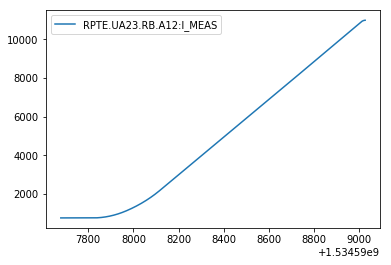

In [9]:
#Plot the current for the first ramp
signalCALSFirst = scals.Signal(signalName, startTimeFirst, endTimeFirst).getSignal(signalName)
signalCALSFirst.plot()


In [9]:
#Get voltage feeler for the first ramp
FirstRamp = scals.Signal(voltages_left, startTimeFirst, endTimeFirst).getSignalDF()
#FirstRamp=FirstRamp.dropna()

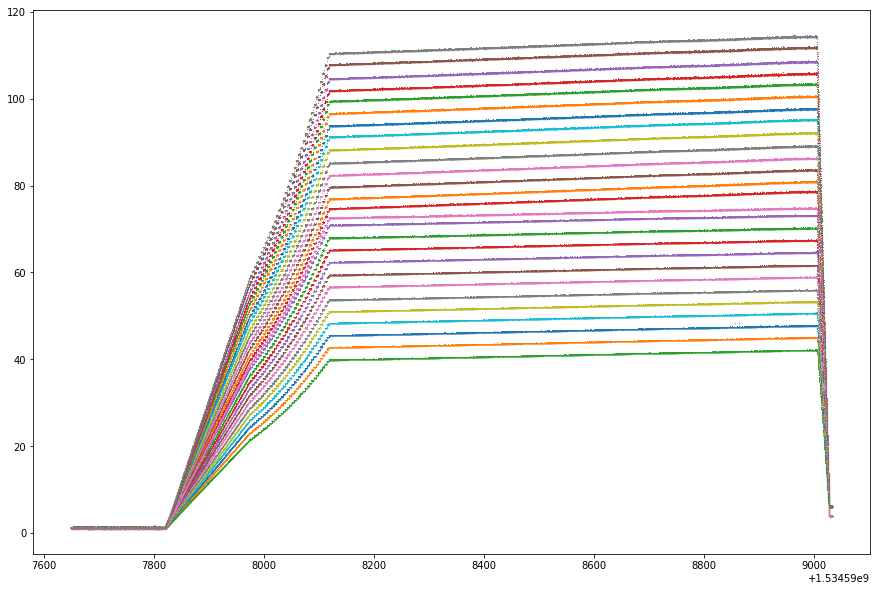

In [10]:
#Plot voltage feeler for the first ramp

FirstRamp.plot(figsize=(15, 10),style='^-',markersize=0.3,legend=False)

Second ramp:

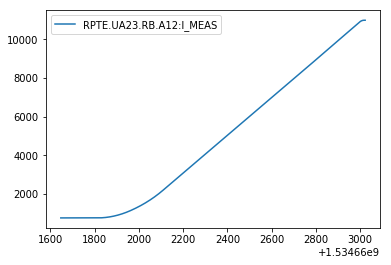

In [10]:
#Plot the current for the second ramp
signalCALSSecond = scals.Signal(signalName, startTimeSecond, endTimeSecond).getSignal(signalName)
signalCALSSecond.plot()

In [11]:
#Get voltage feeler for the Second ramp
SecondRamp= scals.Signal(voltages_left, startTimeSecond, endTimeSecond).getSignalDF()


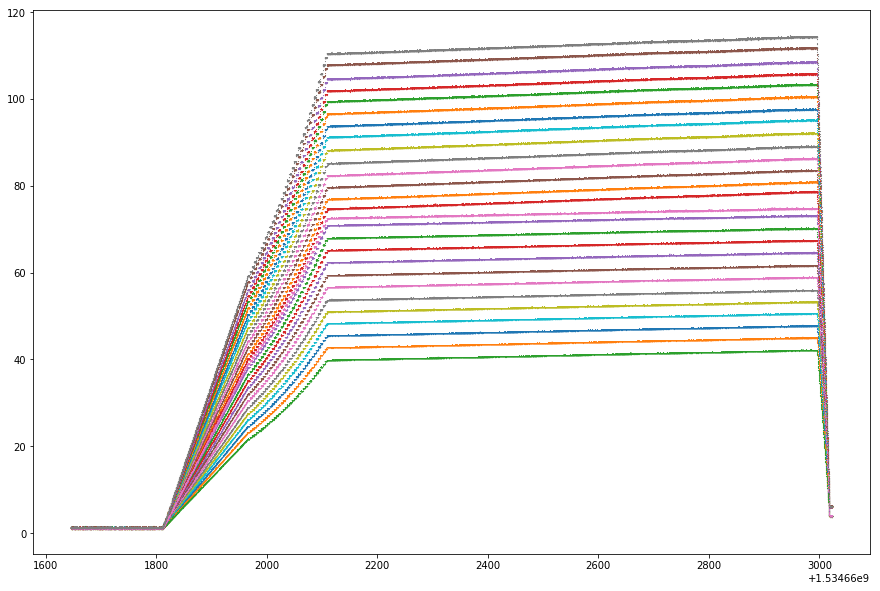

In [12]:
#Plot voltage feelers
SecondRamp.plot(figsize=(15, 10),style='^-',markersize=0.3,legend=False)

First and second ramp for 'MB.A11L3:U_EARTH_RB':

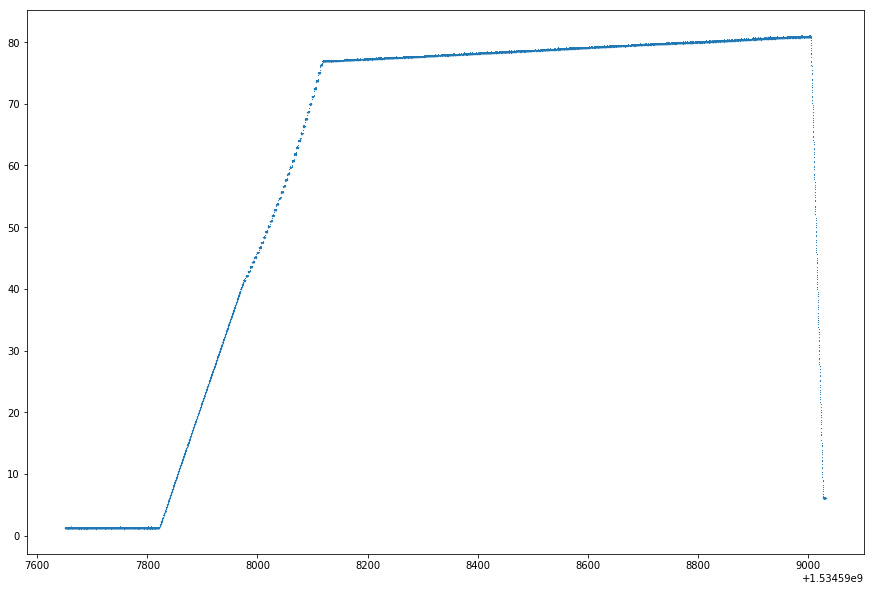

In [13]:
FirstRamp['MB.A11L3:U_EARTH_RB'].plot(figsize=(15, 10),style='^-',markersize=0.3)

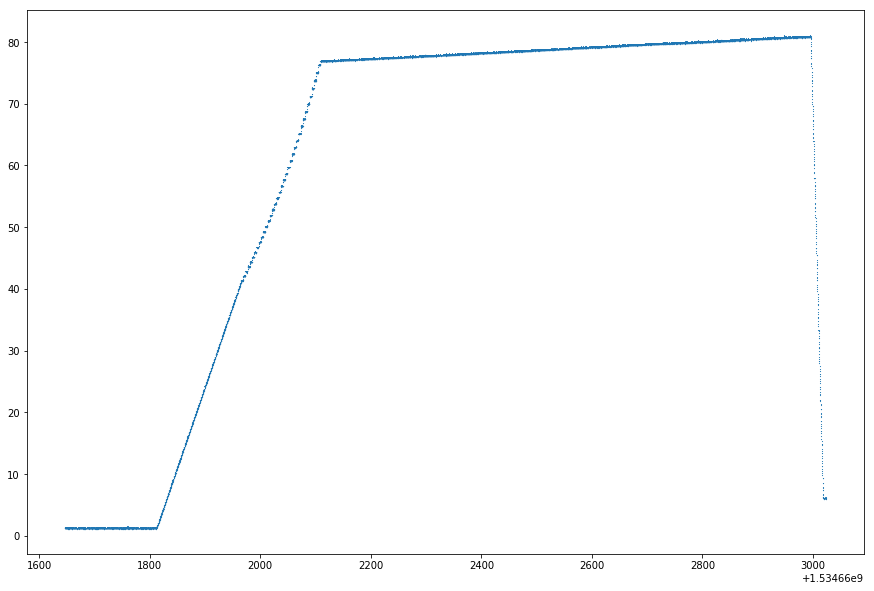

In [31]:
SecondRamp['MB.A11L3:U_EARTH_RB'].plot(figsize=(15, 10),style='^-',markersize=0.3)


Shift the 'MB.A11L3:U_EARTH_RB' for the first and second ramp:

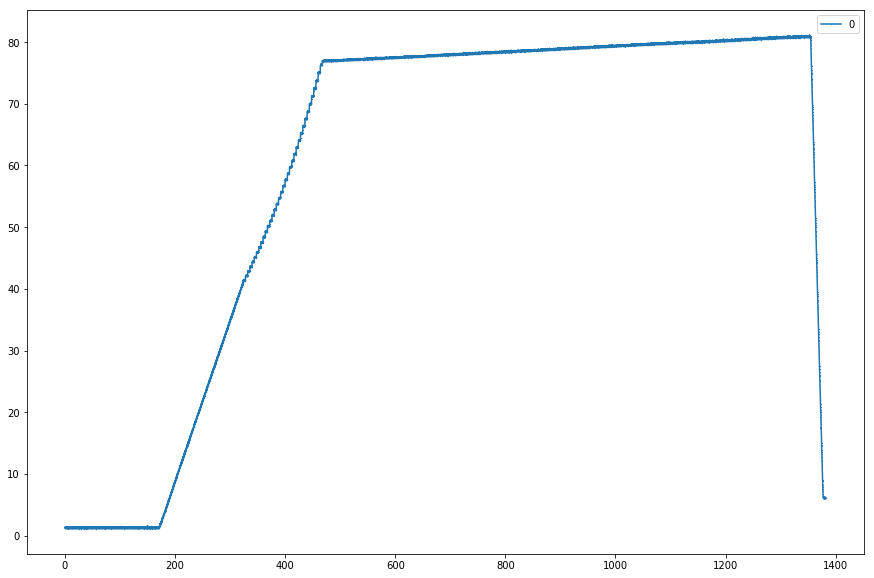

In [41]:
SignalFirst=FirstRamp['MB.A11L3:U_EARTH_RB'].dropna()
IndexShift1=SignalFirst.index[:]-SignalFirst.index[0]
FirstValue=SignalFirst.values

FirstShift=pd.DataFrame(data=FirstValue,index=IndexShift1)
FirstShift.plot(figsize=(15, 10),style='^-',markersize=0.3)


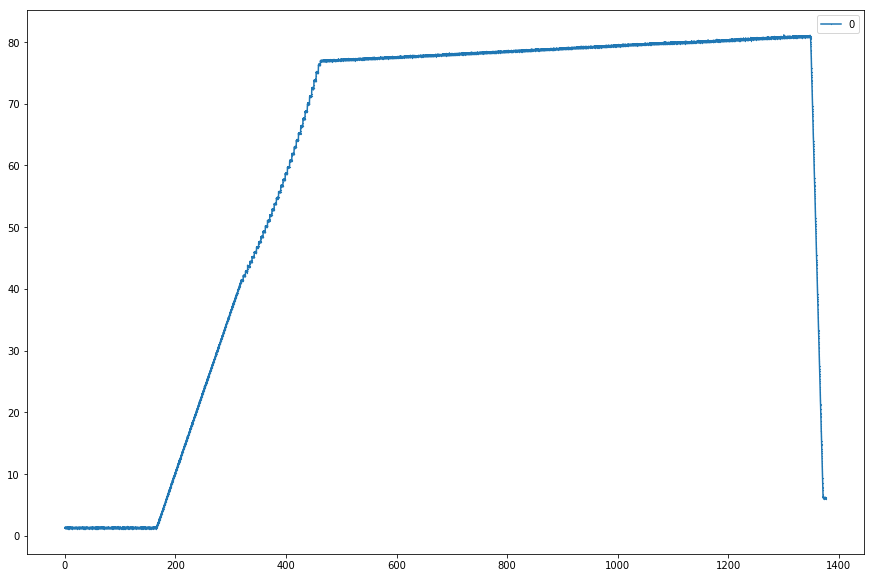

In [42]:
SignalSecond=SecondRamp['MB.A11L3:U_EARTH_RB'].dropna()
IndexShift2=SignalSecond.index[:]-SignalSecond.index[0]
SecondValue=SignalSecond.values

SecondShift=pd.DataFrame(data=SecondValue,index=IndexShift2)
SecondShift.plot(figsize=(15, 10),style='^-',markersize=0.3)

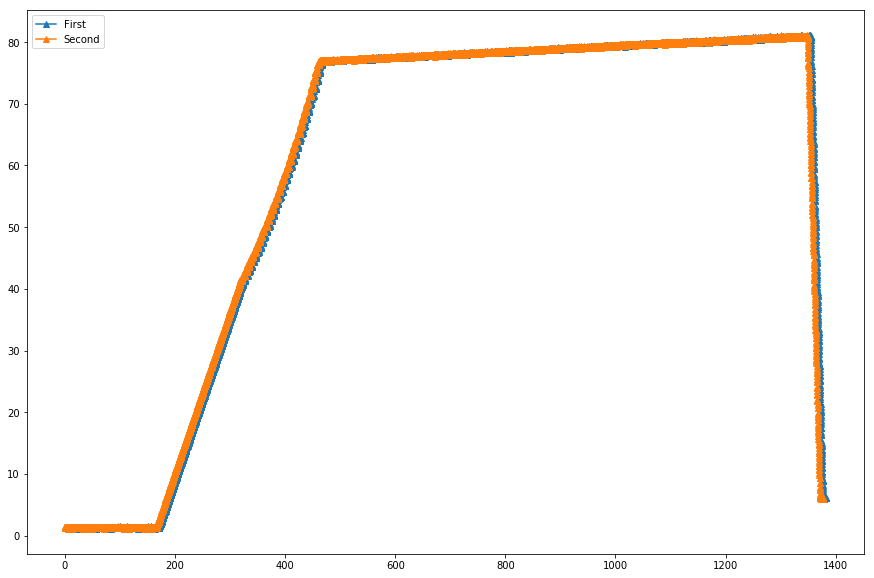

In [43]:
ax = FirstShift.plot(style='^-')
SecondShift.plot(ax=ax,figsize=(15, 10),style='^-')
ax.legend(["First", "Second"]);

Similarity metrics:

In [44]:
print(FirstShift.iloc[0:5,0:5])
print(SecondShift.iloc[0:5,0:5])


              0
0.000  1.346452
0.099  1.309425
0.198  1.309425
0.300  1.236596
0.399  1.263569
              0
0.000  1.318252
0.100  1.318252
0.199  1.211829
0.301  1.273378
0.401  1.378084


In [45]:
Euc = scipy.spatial.distance.cdist(FirstShift.iloc[0:5,0:5], SecondShift.iloc[0:5,0:5], metric='euclidean')

In [46]:
print(Euc)

[[0.02819967 0.02819967 0.13462257 0.07307386 0.03163254]
 [0.00882769 0.00882769 0.09759521 0.0360465  0.0686599 ]
 [0.00882769 0.00882769 0.09759521 0.0360465  0.0686599 ]
 [0.08165622 0.08165622 0.02476668 0.03678203 0.14148843]
 [0.05468273 0.05468273 0.05174017 0.00980854 0.11451495]]


In [47]:
CH = scipy.spatial.distance.cdist(FirstShift.iloc[0:5,0:5], SecondShift.iloc[0:5,0:5], metric='chebyshev')
print(CH)

[[0.02819967 0.02819967 0.13462257 0.07307386 0.03163254]
 [0.00882769 0.00882769 0.09759521 0.0360465  0.0686599 ]
 [0.00882769 0.00882769 0.09759521 0.0360465  0.0686599 ]
 [0.08165622 0.08165622 0.02476668 0.03678203 0.14148843]
 [0.05468273 0.05468273 0.05174017 0.00980854 0.11451495]]


In [50]:
CO = scipy.spatial.distance.cdist(FirstShift.iloc[0:5,0:5], SecondShift.iloc[0:5,0:5], metric='correlation')
print(CO)

[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


In [ ]:
def Shift_Zero(DF):
        IndexShift=DF.index[:]-DF.index[0]
        Value=DF.values
        Shift_DF=pd.DataFrame(data=Value,index=IndexShift)
        return Shift_DF
    
for i in range(len(voltages)):
    
    